# Fixed Lies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("data/fixed_lies/test_map_fixed_lies_x_liars_clustered_100_with_suspects.csv")

In [3]:
data

,node,is_liar,is_blacklisted,lie,lieClusterSize
0,N0,False,False,0,5
1,N1,False,False,0,5
2,N2,False,False,0,5
3,N3,False,False,0,5
4,N5,False,False,0,5
5,N7,False,False,0,5
6,N8,False,False,0,5
7,N9,False,False,0,5
8,N11,False,False,0,5
9,N12,False,False,0,5


In [4]:
data["grouped"] = list(zip(data.is_liar, data.is_blacklisted))
grouped_data = data[["node", "grouped", "lieClusterSize"]]

In [5]:
grouped_data

,node,grouped,lieClusterSize
0,N0,"(False, False)",5
1,N1,"(False, False)",5
2,N2,"(False, False)",5
3,N3,"(False, False)",5
4,N5,"(False, False)",5
5,N7,"(False, False)",5
6,N8,"(False, False)",5
7,N9,"(False, False)",5
8,N11,"(False, False)",5
9,N12,"(False, False)",5


In [6]:
grouped_by_node = grouped_data.groupby(["node", "lieClusterSize"]).agg(lambda x: set(x.values.tolist()))

In [7]:
grouped_by_node["nb_situations"] = grouped_by_node['grouped'].map(lambda x: len(x))

In [8]:
grouped_by_node

grouped  \
node lieClusterSize                                                  
N0   5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N1   5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N10  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N11  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N12  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N13  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N14  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N15  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
...                                                            ...   
N92  20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N93  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N94  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N95  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33                            {(True, False), (False, False)}   
N96  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N97  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N98  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   

In [9]:
data[["node", "lieClusterSize","is_liar", "is_blacklisted"]]\
.groupby(["is_liar", "is_blacklisted", "lieClusterSize"]).count()

node
is_liar is_blacklisted lieClusterSize        
False   False          5                 6700
                       10                6700
                       20                6700
                       33                6700
True    False          33              124375
        True           5                48500
                       10               94500
                       20              179000
                       33              149525

In [10]:
lies = data[["node","lieClusterSize","is_blacklisted"]][data["lie"] > 0]\
            .drop_duplicates()[["lieClusterSize","is_blacklisted"]]

In [11]:
lies

,lieClusterSize,is_blacklisted
14,5,True
135,5,True
238,5,True
338,5,True
439,5,True
566,10,True
666,10,True
772,10,True
878,10,True
978,10,True


In [12]:
lies.groupby("lieClusterSize").agg(lambda x: set(x.values.tolist())).reset_index()

,lieClusterSize,is_blacklisted
0,5,{True}
1,10,{True}
2,20,{True}
3,33,"{False, True}"


In [13]:
bl_by_lie = lies.groupby(['lieClusterSize', 'is_blacklisted']).size().unstack(fill_value=0).reset_index()

In [14]:
bl_by_lie

is_blacklisted,lieClusterSize,False,True
0,5,0,100
1,10,0,100
2,20,0,100
3,33,92,99


Text(0.5, 0, 'Number of liars in network')

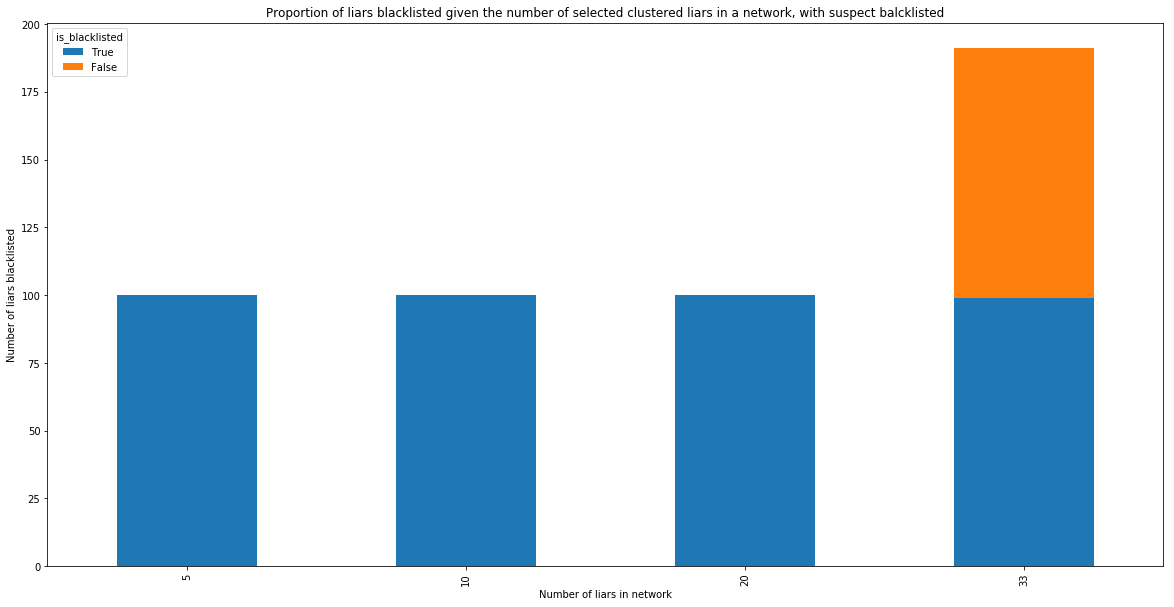

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
bl_by_lie[["lieClusterSize", True, False]]\
.groupby("lieClusterSize").sum().reset_index().plot.bar(
    stacked=True, ax=ax, x="lieClusterSize", 
    title="Proportion of liars blacklisted given the number of selected clustered liars in a network, with suspect balcklisted")

ax.set_ylabel("Number of liars blacklisted")
ax.set_xlabel("Number of liars in network")

In [16]:
fig.savefig('graphs/fixed_lies/test_map_fixed_lies_x_liars_clusteredts_with_suspect.png')